<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/Office_Hour_Capstone_Project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Experimentation Capstone

## Introduction

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

## Problem

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

## Data

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing

In [ ]:
#packages import
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

## Data Preperation

In [ ]:
#data import
df=pd.read_csv("AdSmartABdata.csv")
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [ ]:
df.shape

(8077, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [ ]:
# Checking for nulls
total_nulls=df.isnull().sum()
total_nulls

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [ ]:
# non-answer observations (both 'yes' and 'no' columns are equal to 0)
df_00=df[(df['yes']==0)&(df['no']==0)]
df_00.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0


In [ ]:
# dropped non-answer observations
df_A00=df.drop(df_00.index)
print('# Observations: {}'.format(df_A00.shape[0]))
df_A00.head()

# Observations: 1243


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [ ]:
# Checking for nulls again
df_A00.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

## Exploratory Data Analysis

In [ ]:
#exploring 'experiment' values
df_A00['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [ ]:
number_control=df_A00['experiment'].value_counts().control
number_exposed=df_A00['experiment'].value_counts().exposed
number_control, number_control

(586, 586)

In [ ]:
experiments=df_A00.groupby('experiment')['yes','no'].sum()
experiments

/var/folders/c1/y0qhw1q54ys1fs7mkjx0j_8m0000gn/T/ipykernel_3862/715875088.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  experiments=df_A00.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [ ]:
experiments_yes= df_A00.groupby('experiment')['yes'].sum()
experiments_yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [ ]:
control_yes=experiments_yes.iloc[0]
exposed_yes=experiments_yes.iloc[1]
control_yes, exposed_yes

(264, 308)

## Statistical Analysis

#### Experiment Approach

- Null Hyphothesis 𝐻0: There is no significant difference between the ad success rate of both groups


- Alternative Hyphothesis 𝐻1: There is significant difference between the ad success rate of both groups


- We will perform a two-tailed test


- Confidence Level: 95% (α=0.05)

In [ ]:
# The conversion rate
rate_control= control_yes/number_control
rate_exposed= exposed_yes/number_exposed
print(rate_control, rate_exposed)
print('The conversion rate :', rate_exposed-rate_control)

0.45051194539249145 0.4687975646879756
The conversion rate : 0.018285619295484168


In [ ]:
# Significance Level
alpha = 0.05

In [ ]:
p_pooled_hat=(control_yes+exposed_yes)/(number_control+number_exposed)
p_pooled_hat

0.46017699115044247

In [ ]:
pooled_variance=p_pooled_hat*(1-p_pooled_hat)*(1/number_control+1/number_exposed)
pooled_variance

0.0008020185896747209

In [ ]:
# Standard Error
SE=np.sqrt(pooled_variance)
SE

0.028319932727228023

In [ ]:
# test statsitics
Test_stat=(rate_control - rate_exposed)/SE
Test_stat

-0.645680181221037

In [ ]:
# critical value usig the standard normal distribution
Z_crit=norm.ppf(1-alpha/2)
Z_crit

1.959963984540054

In [ ]:
# Margin of error
m=SE*Z_crit
m

0.055506048189964116

In [ ]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value=norm.sf(Test_stat)*2
p_value

1.4815135017801033

In [ ]:
# Confidence Interval
CI=[(rate_control-rate_exposed)-SE*Z_crit, (rate_control-rate_exposed)+SE*Z_crit]
CI

[-0.07379166748544828, 0.03722042889447995]

In [ ]:
print('Test Statistics stat:', np.round(Test_stat,4))
print('Z-critical:',  np.round(Z_crit,4))
print('P_value:',  np.round(p_value,4))
print('Confidence Interval of 2 sample Z-test for proportions: ', np.round(CI,4))

Test Statistics stat: -0.6457
Z-critical: 1.96
P_value: 1.4815
Confidence Interval of 2 sample Z-test for proportions:  [-0.0738  0.0372]


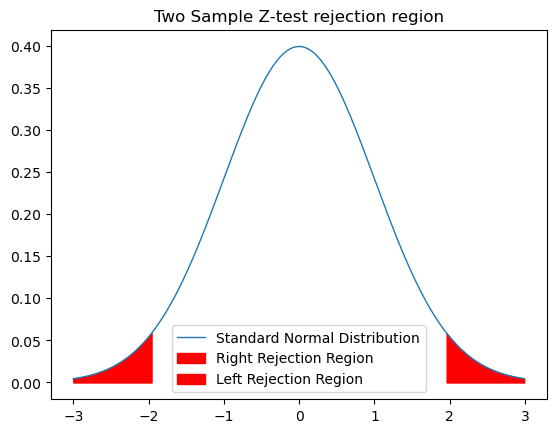

In [ ]:
z=np.arange(-3, 3, 0.01)
plt.plot(z, norm.pdf(z), label='Standard Normal Distribution', linewidth=1)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label='Right Rejection Region',color ='red' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label='Left Rejection Region',color='red' )
plt.title('Two Sample Z-test rejection region')
plt.legend()
plt.show()

In [ ]:
if np.abs(Test_stat)>=Z_crit:
    print(f'Test statistics:{round(np.abs(Test_stat),4)} >= Z-critical:{round(Z_crit,4)}, rejected the null hypothesis')
else:
    print(f'Test statistics:{round(np.abs(Test_stat),4)} < Z-critical:{round(Z_crit,4)}, can not be rejected the null hypothesis')

Test statistics:0.6457 < Z-critical:1.96, can not be rejected the null hypothesis


## Conclusion

- Null hypothesis 𝐻0 can not be rejected, which means that the new advertisement design did not performed better than the old one.

- There were enough data points to make a reasonable judgement.

- Based on the A/B Testing Analysis the new advertisement design does not give an increase in brand awareness.

## References

- https://www.visual-design.net/post/an-interactive-guide-to-hypothesis-testing-in-python

- https://www.yourdatateacher.com/2022/10/17/a-beginners-guide-to-statistical-hypothesis-tests/

- https://pythonguides.com/python-scipy-stats-norm/

- https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

- https://towardsdatascience.com/analyzing-a-b-test-results-with-python-code-b55fdcd8a78e

#**OFFICE HOUR**